In [1]:
#考虑一个具有以下结构的小型神经网络：
#输入层：2个神经元
#隐藏层：2个神经元，使用Sigmoid激活函数
#输出层：1个神经元，使用Sigmoid激活函数
#其中Sigmoid函数定义为：σ(x) = 1/(1+e^(-x))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#计算sigmoid函数
def sigmoid(a):
  return 1/(1 + np.exp(-a))

In [4]:
#前向传播,求输出y_pred
def forward(W1, W2, b1, b2, X):
  Z = np.dot(X, W1.T) + b1 # shape (2,)
  H = sigmoid(Z) # shape (2,)

  Zo = np.dot(H, W2.T) + b2
  y_pred = sigmoid(Zo)
  return Z, H, y_pred

In [5]:
#计算损失函数，loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 / 2
  return loss

In [9]:
#计算反向传导，梯度
def backward(y_pred, y_true, H, W2, X):
  dy = y_pred - y_true
  b2_grad = dy * y_pred * (1-y_pred)
  W2_grad = np.dot(b2_grad, H) # shape (2,)

  dh = np.dot(b2_grad, W2) # shape (2,)
  dz = dh * H * (1 - H) # shape (2,)
  b1_grad = dz       # shape (2,)
  W1_grad = np.dot(dz.T, X) # shape (2,2)
  return W1_grad, W2_grad, b1_grad, b2_grad

In [11]:
#更新梯度参数weight,bias
def update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate):
  W1 -= learning_rate * W1_grad
  W2 -= learning_rate * W2_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  return W1, W2, b1, b2

Epochs: 1 loss: 0.0556 W1_grad: [-0.02] W2_grad: [-0.05 -0.05] b1_grad: [-0.01 -0.01] b2_grad: [-0.07]
Epochs: 101 loss: 0.0134 W1_grad: [-0.01] W2_grad: [-0.02 -0.02] b1_grad: [-0. -0.] b2_grad: [-0.02]
Epochs: 201 loss: 0.0065 W1_grad: [-0.] W2_grad: [-0.01 -0.01] b1_grad: [-0. -0.] b2_grad: [-0.01]
Epochs: 301 loss: 0.0042 W1_grad: [-0.] W2_grad: [-0.01 -0.01] b1_grad: [-0. -0.] b2_grad: [-0.01]
Epochs: 401 loss: 0.003 W1_grad: [-0.] W2_grad: [-0. -0.] b1_grad: [-0. -0.] b2_grad: [-0.01]
Epochs: 501 loss: 0.0023 W1_grad: [-0.] W2_grad: [-0. -0.] b1_grad: [-0. -0.] b2_grad: [-0.]
Epochs: 601 loss: 0.0019 W1_grad: [-0.] W2_grad: [-0. -0.] b1_grad: [-0. -0.] b2_grad: [-0.]
Epochs: 701 loss: 0.0016 W1_grad: [-0.] W2_grad: [-0. -0.] b1_grad: [-0. -0.] b2_grad: [-0.]
Epochs: 801 loss: 0.0014 W1_grad: [-0.] W2_grad: [-0. -0.] b1_grad: [-0. -0.] b2_grad: [-0.]
Epochs: 901 loss: 0.0012 W1_grad: [-0.] W2_grad: [-0. -0.] b1_grad: [-0. -0.] b2_grad: [-0.]


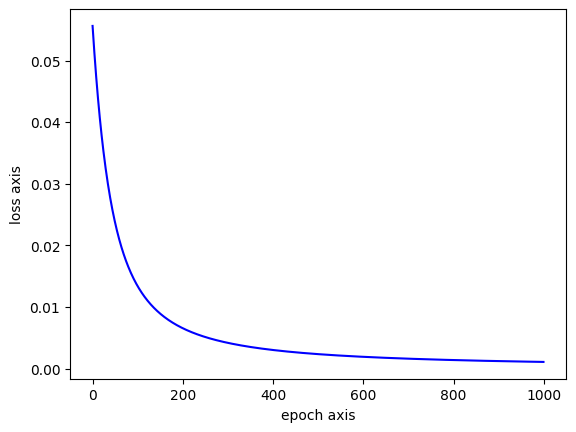

In [14]:
#初始化参数

W1 = np.array([[0.1, 0.2],
        [0.3, 0.1]]) #shape (2,2)（第一行对应第一个隐藏神经元，第二行对应第二个隐藏神经元）

b1 = np.array([0.1, 0.2]) #shape (2,)
W2 = np.array([0.4, 0.5]) #ndarray (2,)
b2 = 0.1
X = np.array([1, 2]) #ndarray (2,)

y_true = 1
learning_rate = 0.1

epochs = 1000

losses = []

for epoch in range(epochs):
  Z, H, y_pred = forward(W1, W2, b1, b2, X)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  W1_grad, W2_grad, b1_grad, b2_grad = backward(y_pred, y_true, H, W2, X)
  W1, W2, b1, b2 = update_params(W1, W2, b1, b2, W1_grad, W2_grad, b1_grad, b2_grad, learning_rate)

  if epoch%100 == 0:
    print("Epochs:", epoch + 1,
      "loss:", np.round(loss, 4),
      "W1_grad:", np.round(W1_grad.flatten(), 2),
      "W2_grad:", np.round(W2_grad.flatten(), 2),
      "b1_grad:", np.round(b1_grad.flatten(), 2),
      "b2_grad:", np.round(b2_grad.flatten(), 2)
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()